# Plot linear power parameters from extended Planck chains

This notebook shows how to read one of the extended Planck chains with linear power parameters.

It also compares the contours with the likelihoods on these parameters from Lya P1D.

In [1]:
%load_ext autoreload
%autoreload 2
import numpy as np
import os
from getdist import plots,loadMCSamples
import matplotlib.pyplot as plt
from cup1d.planck import planck_chains
from cup1d.planck import add_linP_params
from cup1d.interface import marg_lya_like
# because of black magic, the order of the imports here matters
%matplotlib inline

### Read extended Planck chains and plot linear power parameters

These chains are already provided in cup1d

In [2]:
# massless neutrinos, Planck only
planck2018=planck_chains.get_planck_2018(model='base',data='plikHM_TTTEEE_lowl_lowE')
# massive neutrinos, Planck only
planck2018_mnu=planck_chains.get_planck_2018(model='base_mnu',data='plikHM_TTTEEE_lowl_lowE')
# massive neutrinos, Planck + BAO
planck2018_mnu_BAO=planck_chains.get_planck_2018(model='base_mnu',data='plikHM_TTTEEE_lowl_lowE_BAO')

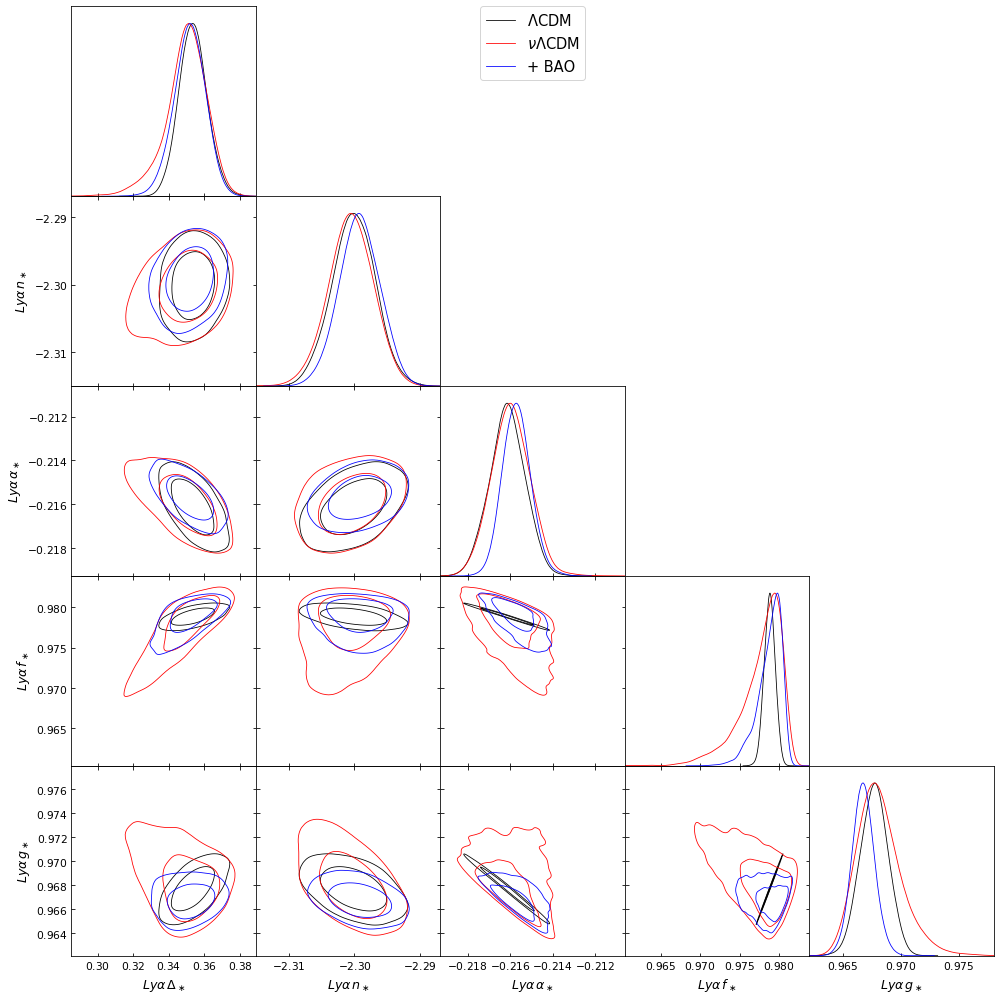

In [3]:
# linear power parameters
g = plots.getSubplotPlotter(width_inch=14)
g.settings.axes_fontsize = 12
g.settings.legend_fontsize = 16
g.triangle_plot([planck2018['samples'],planck2018_mnu['samples'],planck2018_mnu_BAO['samples']],
                ['linP_DL2_star','linP_n_star','linP_alpha_star','linP_f_star','linP_g_star'],
                legend_labels=[r'$\Lambda$CDM',r'$\nu\Lambda$CDM',r'+ BAO'])

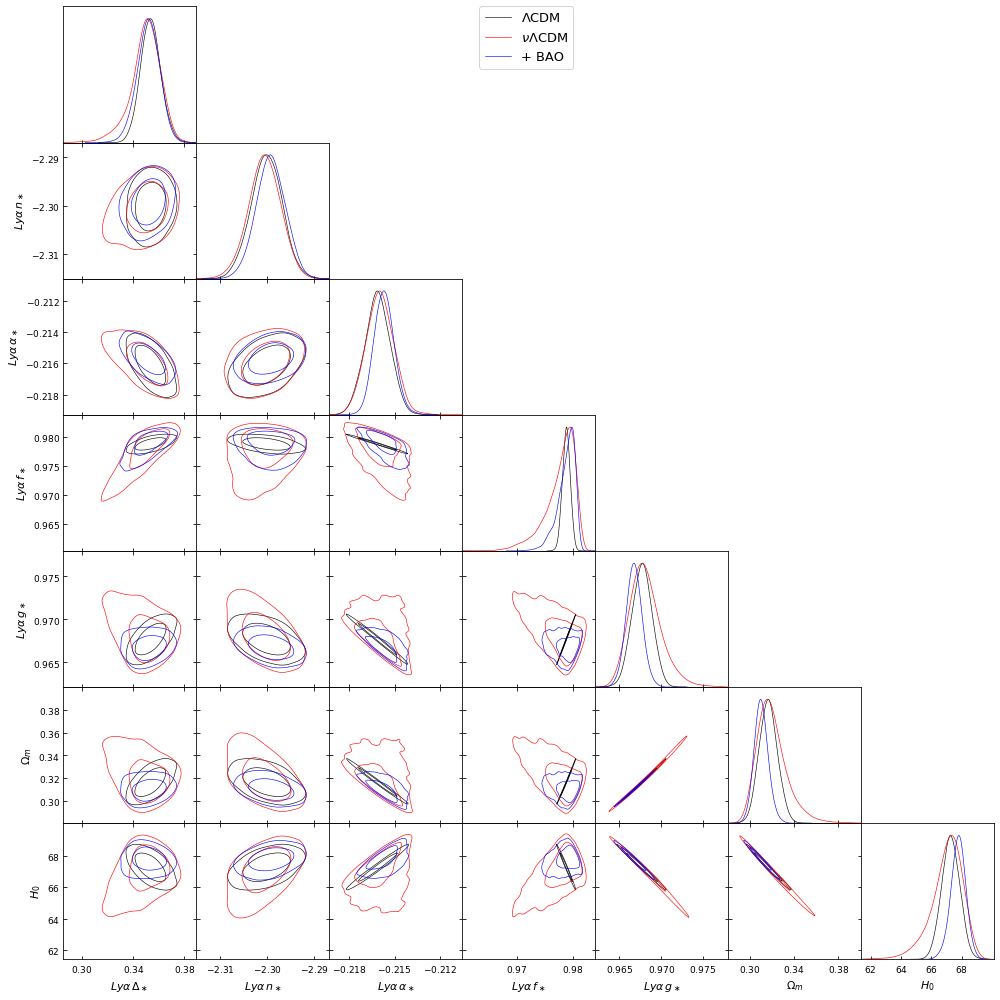

In [4]:
# plot also Omega_m and H_0
# linear power parameters
g = plots.getSubplotPlotter(width_inch=14)
g.settings.axes_fontsize = 12
g.settings.legend_fontsize = 16
g.triangle_plot([planck2018['samples'],planck2018_mnu['samples'],planck2018_mnu_BAO['samples']],
                ['linP_DL2_star','linP_n_star','linP_alpha_star','linP_f_star','linP_g_star','omegam','H0'],
                legend_labels=[r'$\Lambda$CDM',r'$\nu\Lambda$CDM',r'+ BAO'])

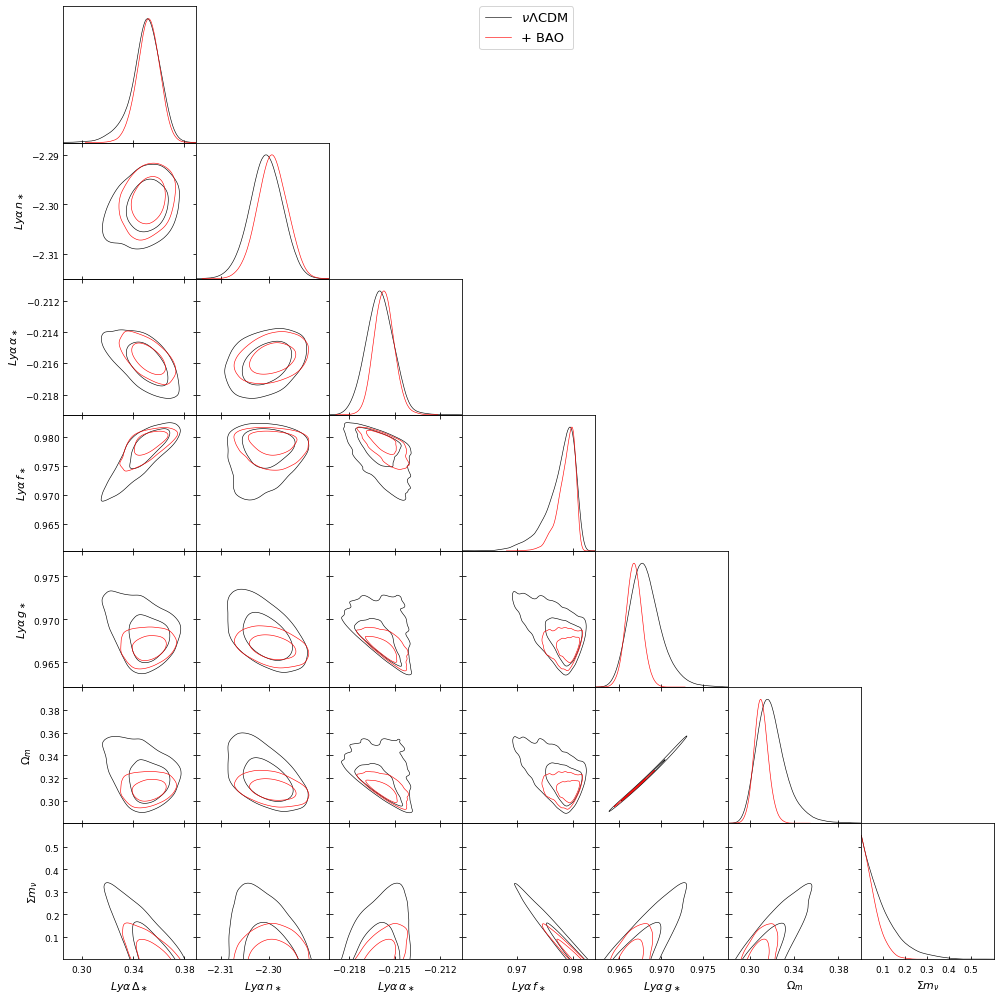

In [5]:
# plot also neutrino mass (for nuLCDM)
g = plots.getSubplotPlotter(width_inch=14)
g.settings.axes_fontsize = 12
g.settings.legend_fontsize = 16
g.triangle_plot([planck2018_mnu['samples'],planck2018_mnu_BAO['samples']],
                ['linP_DL2_star','linP_n_star','linP_alpha_star','linP_f_star','linP_g_star','omegam','mnu'],
                legend_labels=[r'$\nu\Lambda$CDM',r'+ BAO'])

### Plot linear power parameters from chain and from Lya likelihoods

In [6]:
# create grid (note j in number of elements, crazy python)
thresholds = [2.30,6.17,11.8]
neff_grid,DL2_grid = np.mgrid[-2.4:-2.2:100j, 0.2:0.5:100j]
chi2_Mc2005=marg_lya_like.gaussian_chi2_McDonald2005(neff_grid,DL2_grid)
chi2_PD2015=marg_lya_like.gaussian_chi2_PalanqueDelabrouille2015(neff_grid,DL2_grid)
chi2_Ch2019=marg_lya_like.gaussian_chi2_Chabanier2019(neff_grid,DL2_grid)

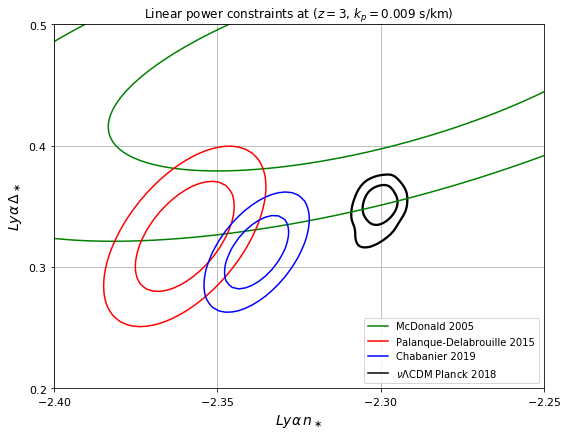

In [7]:
g = plots.getSinglePlotter(width_inch=8)
#g.plot_2d(planck2018['samples'], ['linP_n_star', 'linP_DL2_star'],lims=[-2.4,-2.25,0.2,0.5])
g.plot_2d(planck2018_mnu['samples'], ['linP_n_star', 'linP_DL2_star'],lims=[-2.4,-2.25,0.2,0.5])
#g.plot_2d(planck2018_mnu_BAO['samples'], ['linP_n_star', 'linP_DL2_star'],lims=[-2.4,-2.25,0.2,0.5])
plt.contour(neff_grid,DL2_grid,chi2_Mc2005,levels=thresholds[:2],colors='green')
plt.contour(neff_grid,DL2_grid,chi2_PD2015,levels=thresholds[:2],colors='red')
plt.contour(neff_grid,DL2_grid,chi2_Ch2019,levels=thresholds[:2],colors='blue')
plt.axhline(y=1,color='green',label='McDonald 2005')
plt.axhline(y=1,color='red',label='Palanque-Delabrouille 2015')
plt.axhline(y=1,color='blue',label='Chabanier 2019')
plt.axhline(y=1,color='black',label=r'$\nu \Lambda$CDM Planck 2018')
plt.title(r'Linear power constraints at ($z=3$, $k_p=0.009$ s/km)')
plt.grid()  
plt.legend(loc=4)